# To Explore Unsupervised Machine Learning

## From the given 'Iris' Dataset , predict the optimum number of clusters and represent it visually

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visual representation of model output
from sklearn.preprocessing import StandardScaler #for normalising the features
from sklearn.cluster import KMeans #for training the model using KMeans clustering

### UNDERSTANDING DATASET
- ### The contains flower Sepal and Petal dimensions and the species to which the flower belongs to.
- ### There are 150 entries and 6 features
- ### There are no Null values; no need of imputation or deletion of data

In [2]:
#Read Dataset
iris_data=pd.read_csv('Iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris_data.shape

(150, 6)

In [16]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### FEATURE ANALYSIS & SELECTION

- ### The column 'Id' denotes the number of entries of data and 'Species' denotes the classification of the flower.Hence, excluding them for training the model.
- ### The independent features which can be used in training are SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.

In [4]:
X=iris_data.iloc[:,1:5]

### To understand the distribution of each dependent feature, we use describe method

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- ### It can be seen that the dependent feature SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm have different distributions with different means and standard deviations.
- ### Since KMeans clustering involves clustering of the data using the euclidean distance between the data and centroid, standardization of the features must be performed before using the feature to train the model.

In [6]:
#Standardization of independent variables

sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std=pd.DataFrame(X_std)
X_std.columns=X.columns

### CHOOSING NUMBER OF CLUSTERS

- ### For chosing appropriate k value for clustering , the Elbow Method curve (Number of Clusters k Vs Sum of Squared Errors ) is plotted .

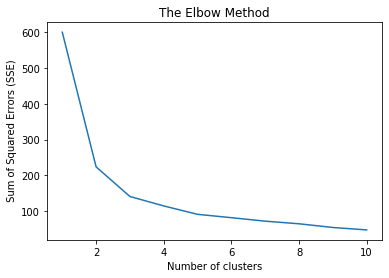

In [7]:
ls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_std)
    ls.append(km.inertia_)
    
plt.plot(range(1,11),ls)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel(' Sum of Squared Errors (SSE)')
plt.show()

- ### From the above graph, it can be inferred that from the value k=3, the SSE decreases and the curve is almost parallel to x-axis for higher k values i.e the error gradually decreases to tends to zero.
- ### Hence, we can choose number of clusters=3 for training the model.

### MODEL TRAINING

In [8]:
#Model training using KMeans Clustering Algorithm
#n_clusters => No. of Clusters
#max_iter => maximum number of iteration
#init ='k-means++'=> for faster convergence

km=KMeans(n_clusters=3,max_iter=100,init='k-means++') 
y_kmeans=km.fit_predict(X_std)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### VISUALISATION

<function matplotlib.pyplot.show(*args, **kw)>

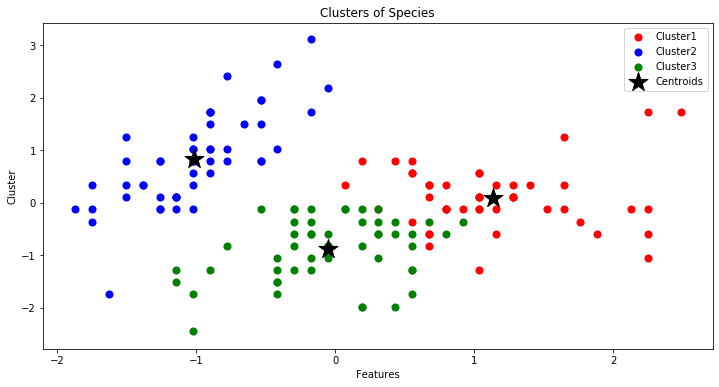

In [9]:
plt.figure(figsize=(12,6))

plt.scatter(X_std.iloc[y_kmeans==0,0],X_std.iloc[y_kmeans==0,1],s=50,c='red',label='Cluster1')
plt.scatter(X_std.iloc[y_kmeans==1,0],X_std.iloc[y_kmeans==1,1],s=50,c='blue',label='Cluster2')
plt.scatter(X_std.iloc[y_kmeans==2,0],X_std.iloc[y_kmeans==2,1],s=50,c='green',label='Cluster3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',s=400,c='black',label='Centroids')

plt.title('Clusters of Species')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show

### For Comparison of the results with and without standardization, another model is trained with non-standardized  features and visualised.

In [13]:
km1=KMeans(n_clusters=3,max_iter=100,init='k-means++')
y_kmeans1=km1.fit_predict(X)
y_kmeans1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<function matplotlib.pyplot.show(*args, **kw)>

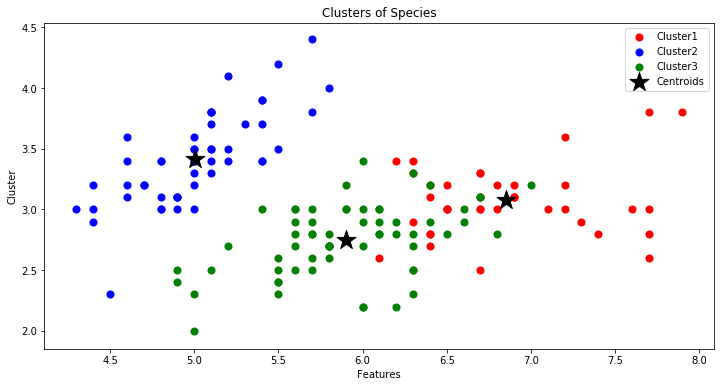

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(X.iloc[y_kmeans1==0,0],X.iloc[y_kmeans1==0,1],s=50,c='red',label='Cluster1')
plt.scatter(X.iloc[y_kmeans1==1,0],X.iloc[y_kmeans1==1,1],s=50,c='blue',label='Cluster2')
plt.scatter(X.iloc[y_kmeans1==2,0],X.iloc[y_kmeans1==2,1],s=50,c='green',label='Cluster3')

plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='*',s=400,c='black',label='Centroids')
plt.title('Clusters of Species')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show

### INFERENCE
- ### The Optimum value of number of clusters is k=3.
- ### From the visualizations, the cluster demarkation of the clusters 1 and clusters 3 are better and accurate if the  standardised features are used for model training.